In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os
import ProbabilisticParcellation.util as ut
from copy import deepcopy



## Explore functional profiles in M1-M4 regions 

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)

Data_all_individ = pd.read_csv(ut.export_dir + '/Profiles/' +
                       'NettekovenSym32_profile_individ.tsv', delimiter='\t')
Data_all_group = pd.read_csv(ut.export_dir + '/Profiles/' +
                               'NettekovenSym32_profile_group.tsv', delimiter='\t')


0.45651898902177857


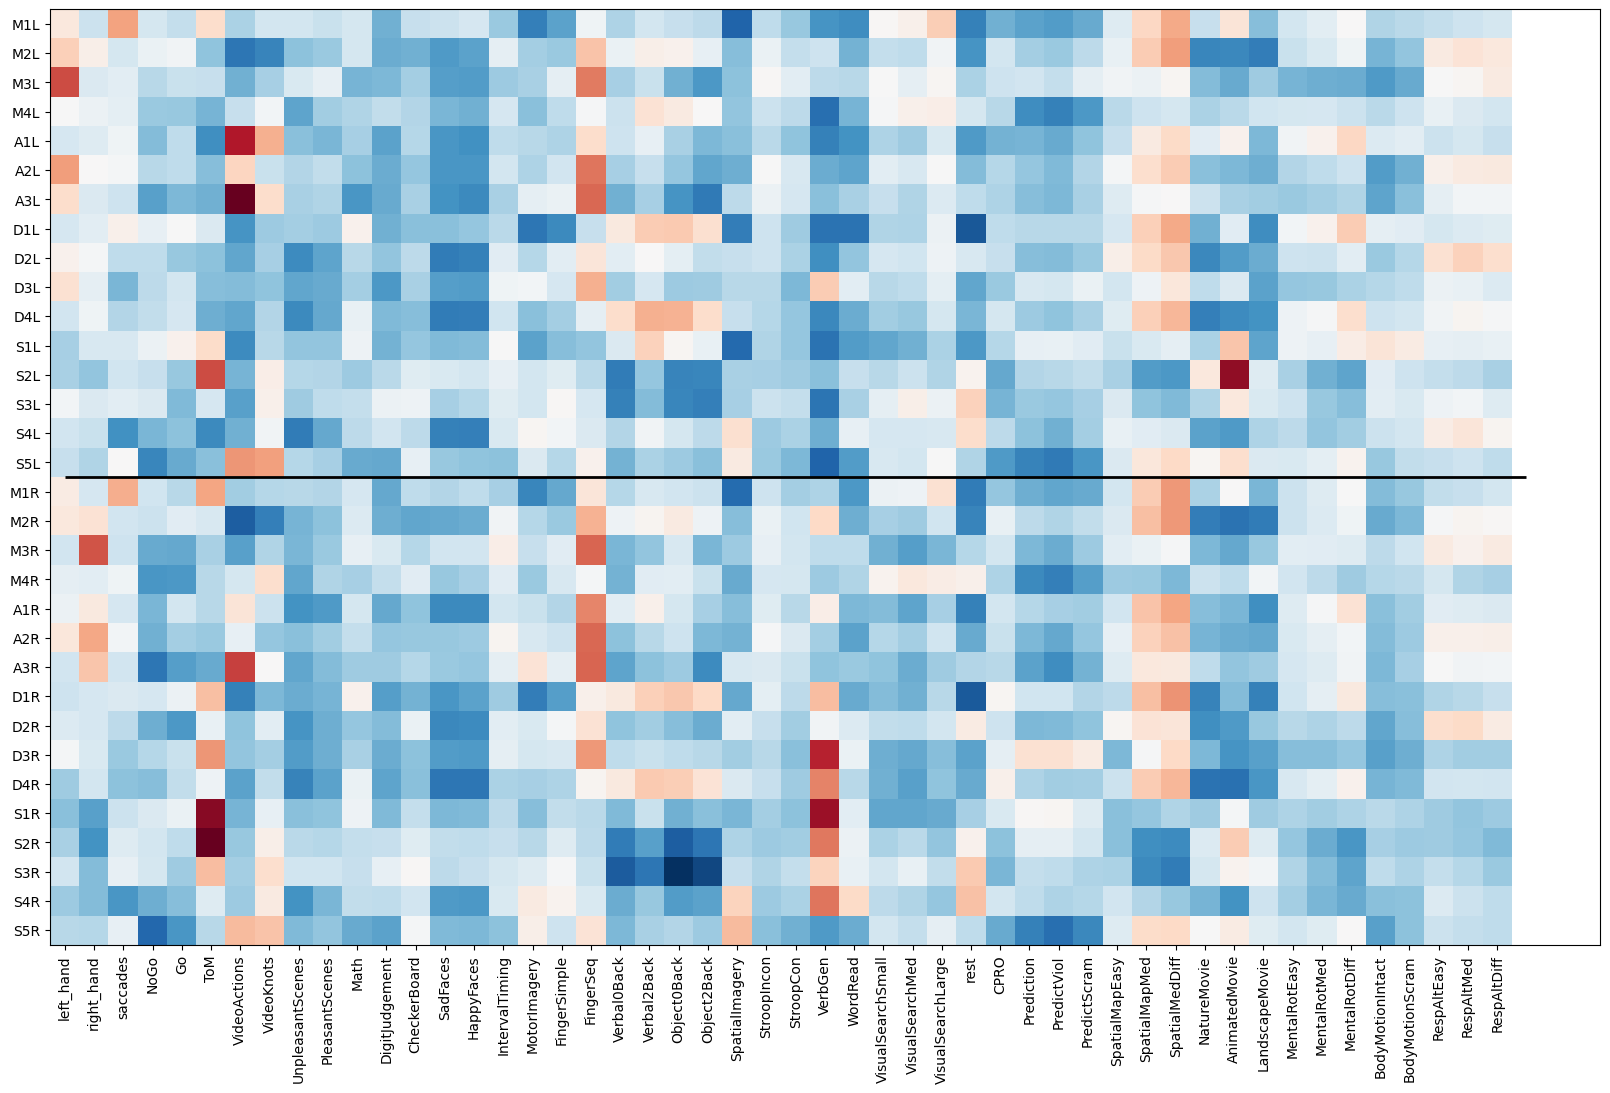

In [4]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)


# Replace task names with the names used in King et al. (2019) to describe the tasks for consistency
replace = {'SpatialNavigation': 'SpatialImagery',
              'RomanceMovie': 'AnimatedMovie', 'VideoAct': 'VideoActions'}
for i in range(len(Features.columns.tolist())):
    if Features.columns.tolist()[i] in replace.keys():
        Features.rename(columns={Features.columns.tolist()[i]: replace[Features.columns.tolist()[i]]}, inplace=True)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'feature_matrix_updated.png', dpi=300, bbox_inches='tight')



In [6]:
print(Features.max().max())
print(Features.min().min())



0.45651898902177857
-0.27370554532958397


# Compare with action regions

In [28]:
motor_regions = ['M1L','M1R','M2L','M2R','M3L','M3R','M4L','M4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]
action_regions = ['A1L','A1R','A2L','A2R','A3L','A3R']
select_regions = motor_regions + action_regions
select_colors = reg_colors + reg_colors

In [29]:
def normalize(data, axis=0):
    """Normalize data by subtracting the mean of each column and dividing by the standard deviation.
    """
    data = deepcopy(data)
    data -= data.mean(axis=axis)
    data /= data.std(axis=axis)

    return data

In [30]:
Somatotopic = Data_all_individ[Data_all_individ.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine = Data_all_individ[Data_all_individ.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC = Data_all_individ[Data_all_individ.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto = Data_all_individ[Data_all_individ.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])


Somatotopic_group = Data_all_group[Data_all_group.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine_group = Data_all_group[Data_all_group.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC_group = Data_all_group[Data_all_group.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto_group = Data_all_group[Data_all_group.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])


Text(0.5, 1.0, 'Features individual')

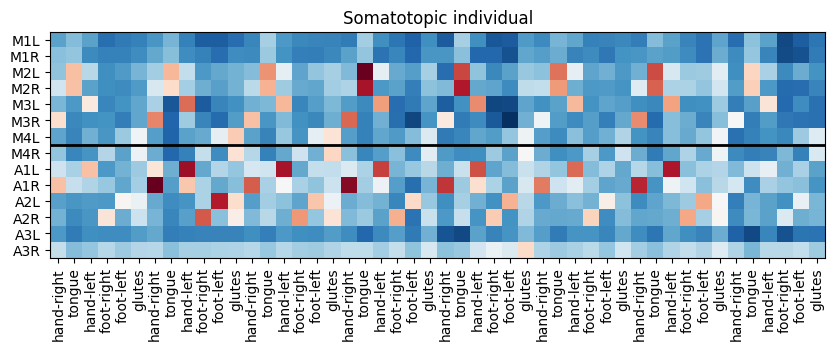

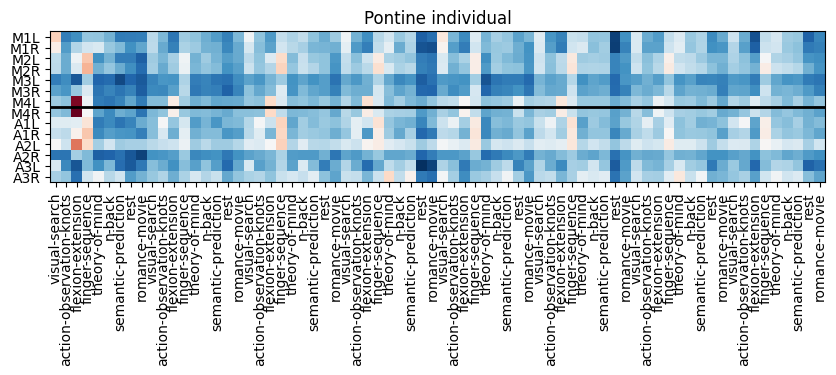

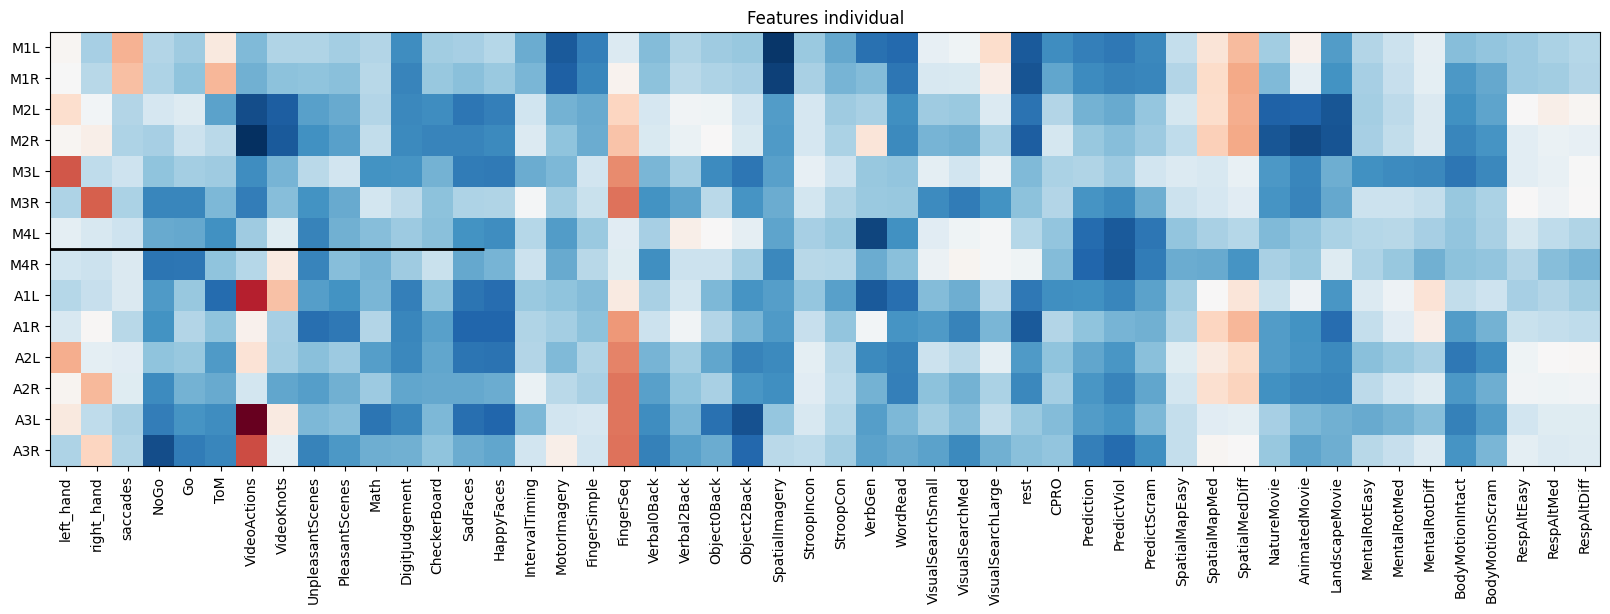

In [31]:
# Plot individual
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic.condition.tolist())),
           Somatotopic.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic.index.tolist()) - 0.5, color='black', linewidth=2)
plt.title('Somatotopic individual')

plt.figure(figsize=(10, 10))
plt.imshow(Pontine[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine.condition.tolist())),
           Pontine.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Pontine.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Pontine individual')

plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Features.loc[select_regions].index.tolist())-0.5, color='black', linewidth=2)
plt.title('Features individual')

In [32]:
Somatotopic_avg = Somatotopic.drop(columns=['dataset', 'session', 'participant_id']).groupby(['condition']).mean().reset_index()
Pontine_avg = Pontine.drop(columns=['dataset', 'session', 'participant_id']).groupby(['condition']).mean().reset_index()

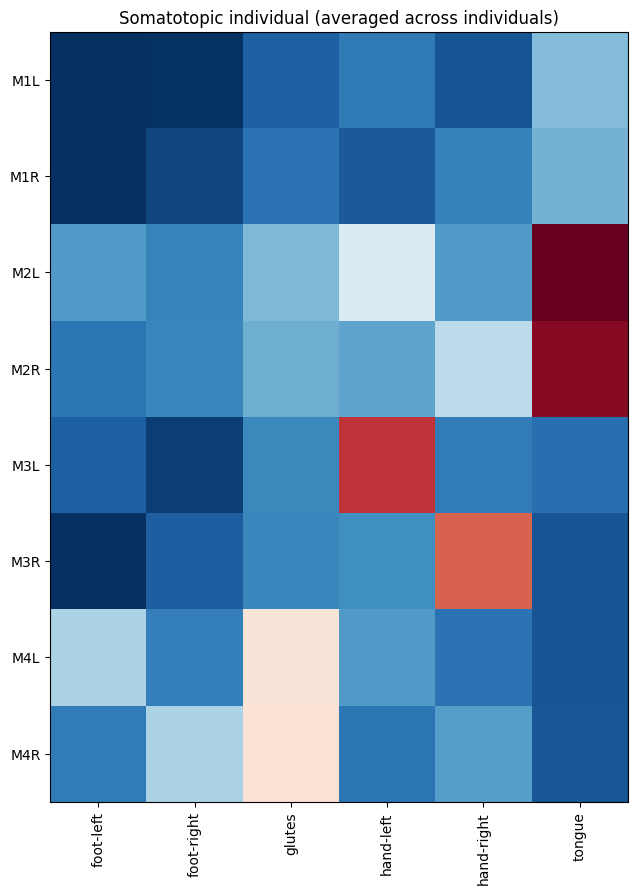

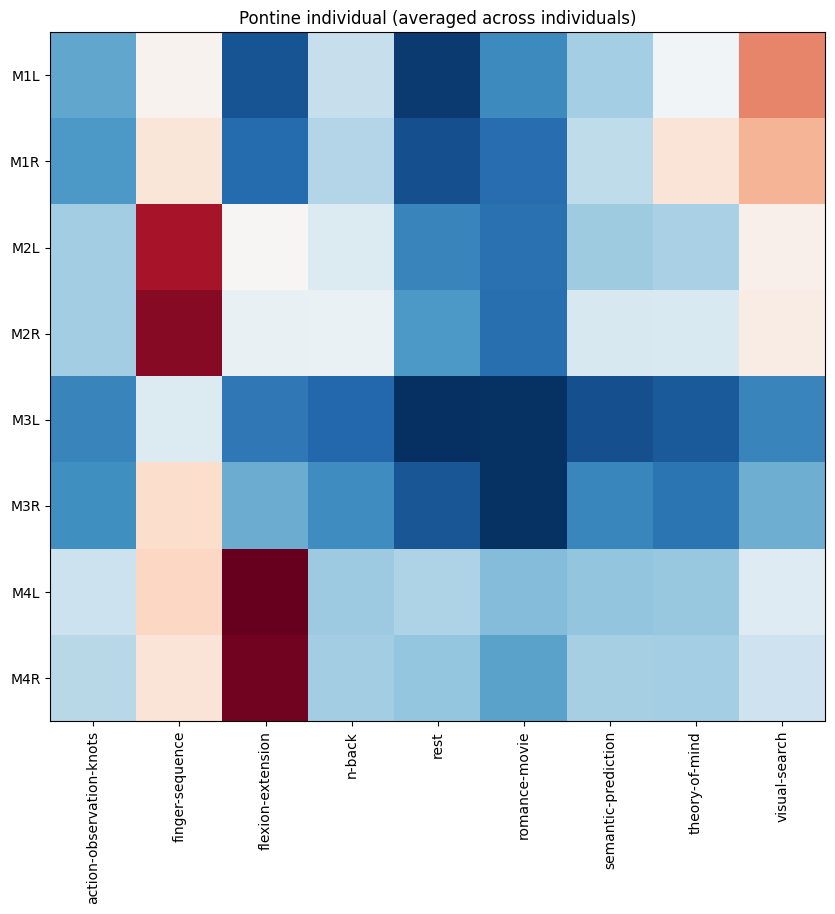

In [33]:
# Plot individual average
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_avg[motor_regions].T, cmap=cmap)
plt.yticks(np.arange(len(motor_regions)), motor_regions)
plt.xticks(np.arange(len(Somatotopic_avg.condition.tolist())),
           Somatotopic_avg.condition.tolist(), rotation=90)
plt.title('Somatotopic individual (averaged across individuals)')
plt.savefig(ut.figure_dir + 'Somatotopic_individual_avg.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_avg[motor_regions].T, cmap=cmap)
plt.yticks(np.arange(len(motor_regions)), motor_regions)
plt.xticks(np.arange(len(Pontine_avg.condition.tolist())),
           Pontine_avg.condition.tolist(), rotation=90)
plt.title('Pontine individual (averaged across individuals)')
plt.savefig(ut.figure_dir + 'Pontine_individual_avg.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Pontine group (mean)')

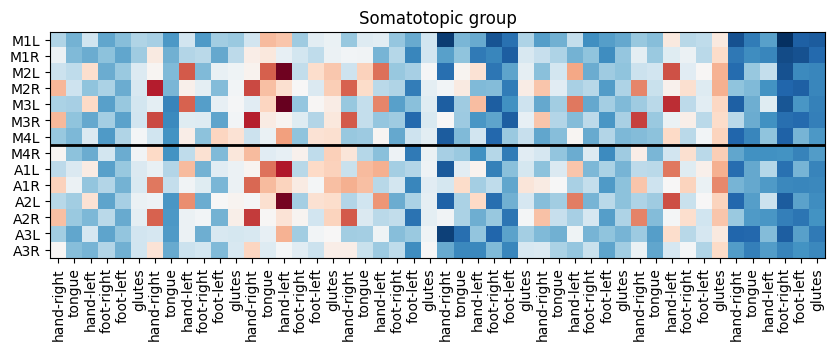

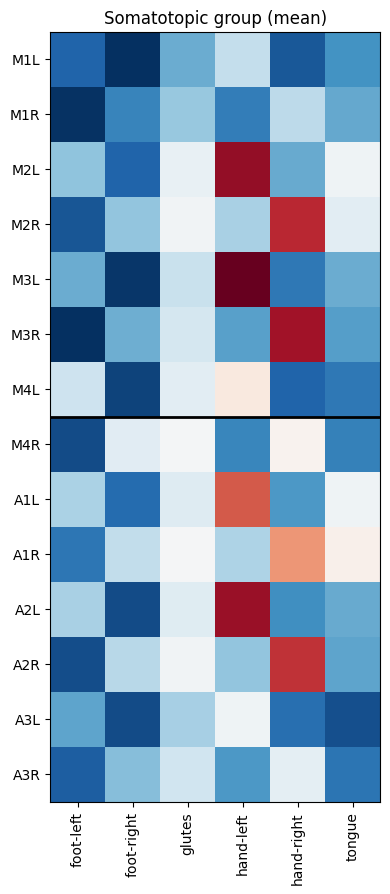

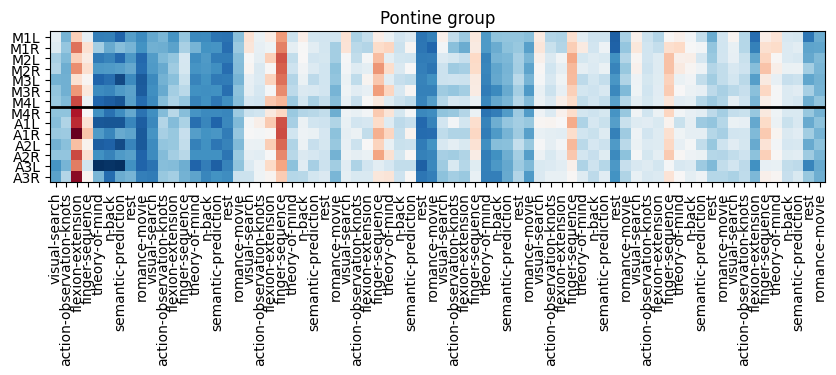

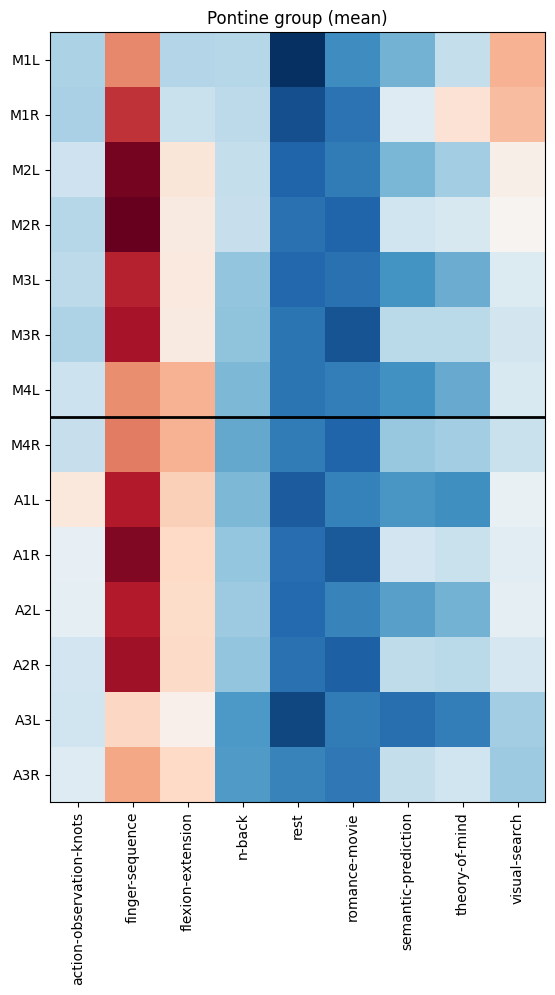

In [34]:
# Plot group
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_group[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic_group.condition.tolist())),
              Somatotopic_group.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,

              len(Somatotopic_group.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Somatotopic group')

# Plot group
Somatotopic_mean = Somatotopic_group.drop(columns=['dataset', 'session', 'participant_id']).groupby(
    ['condition']).mean()[select_regions].T
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_mean, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic_mean.columns.tolist())),
           Somatotopic_mean.columns.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic_mean.columns.tolist()) - 0.5, color='black', linewidth=2)
plt.title('Somatotopic group (mean)')


plt.figure(figsize=(10, 10))
plt.imshow(Pontine_group[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine_group.condition.tolist())),
                Pontine_group.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,

                len(Pontine_group.index.tolist())-0.5, color='black', linewidth=2)
plt.title('Pontine group')

# Plot group
Pontine_mean = Pontine_group.drop(columns=['dataset', 'session', 'participant_id']).groupby(
    ['condition']).mean()[select_regions].T
plt.figure(figsize=(10, 10))
plt.imshow(Pontine_mean, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine_mean.columns.tolist())),
           Pontine_mean.columns.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Pontine_mean.columns.tolist()) - 0.5, color='black', linewidth=2)
plt.title('Pontine group (mean)')


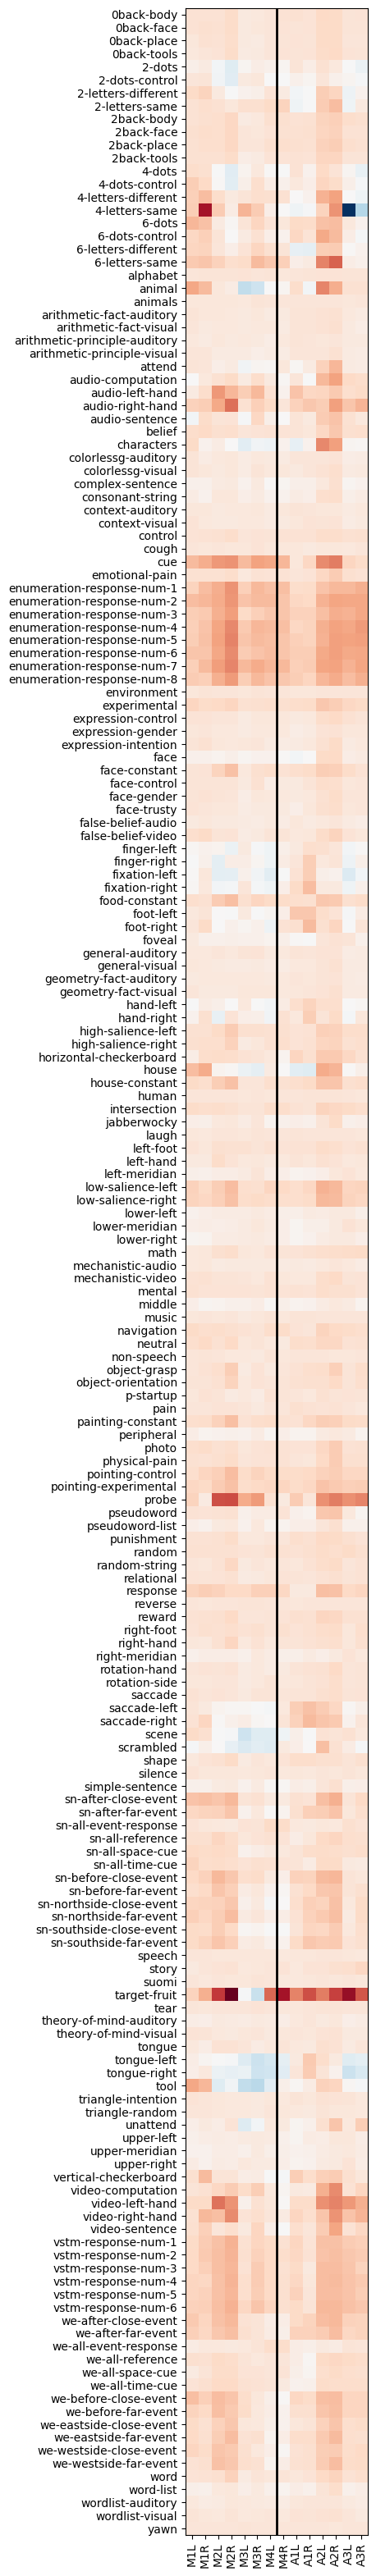

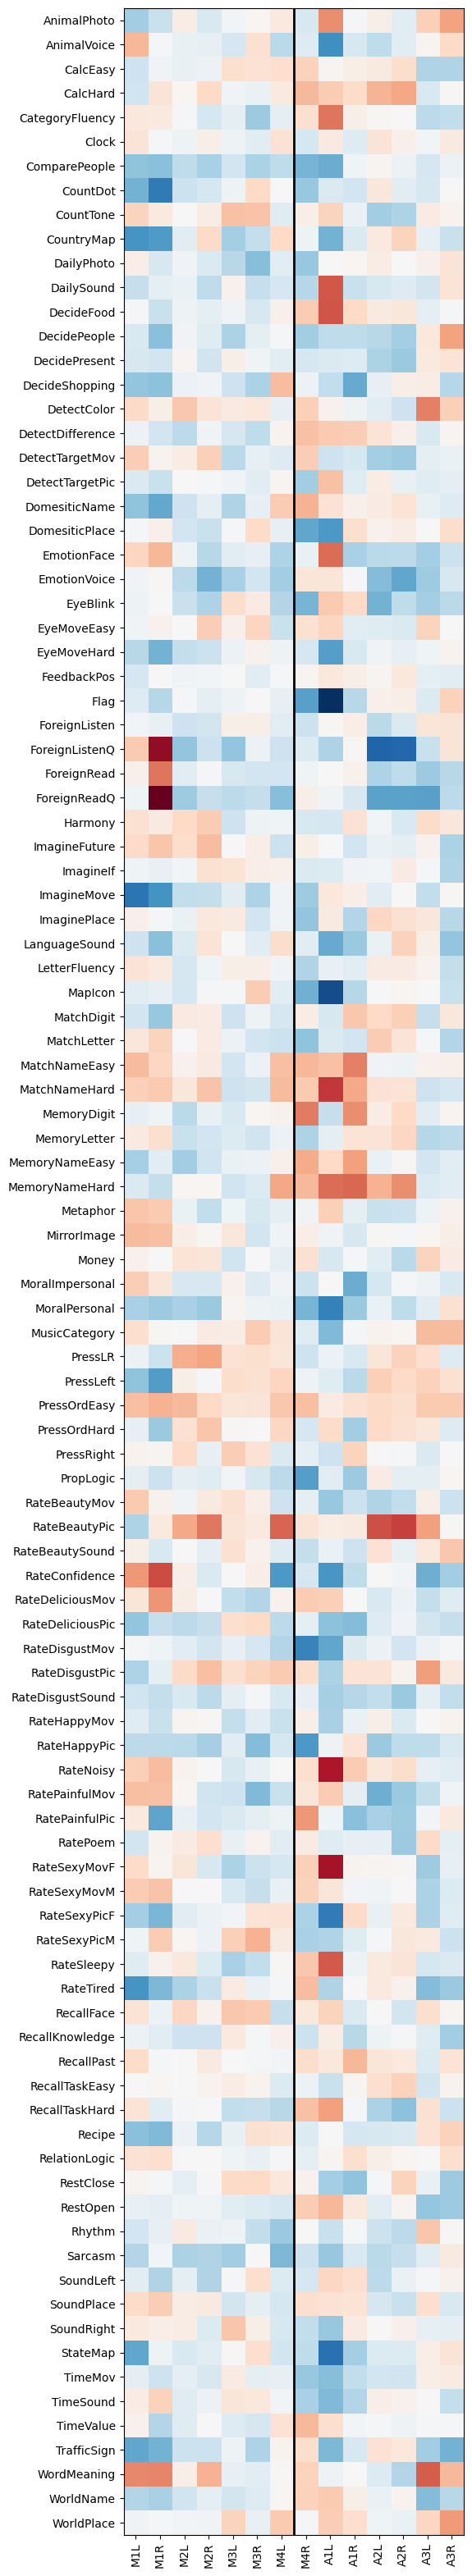

In [35]:
IBC_avg = IBC.drop(columns=['dataset', 'session', 'participant_id']).groupby('condition').mean()
# IBC_avg[regions] = normalize(IBC_avg[regions])

Nishimoto_avg = Nishimoto.drop(columns=['dataset', 'session', 'participant_id']).groupby('condition').mean()
# Nishimoto_avg[regions] = normalize(Nishimoto_avg[regions])
# --- IBC & Nishimoto ----
plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(IBC_avg.index.tolist())),
           IBC_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
                len(IBC_avg.index.tolist()) - 0.5, color='black', linewidth=2)

select_regions = motor_regions + action_regions
plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg.index.tolist())),
           Nishimoto_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Nishimoto_avg.index.tolist()) - 0.5, color='black', linewidth=2)

In [36]:
# Melt
T = Features.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


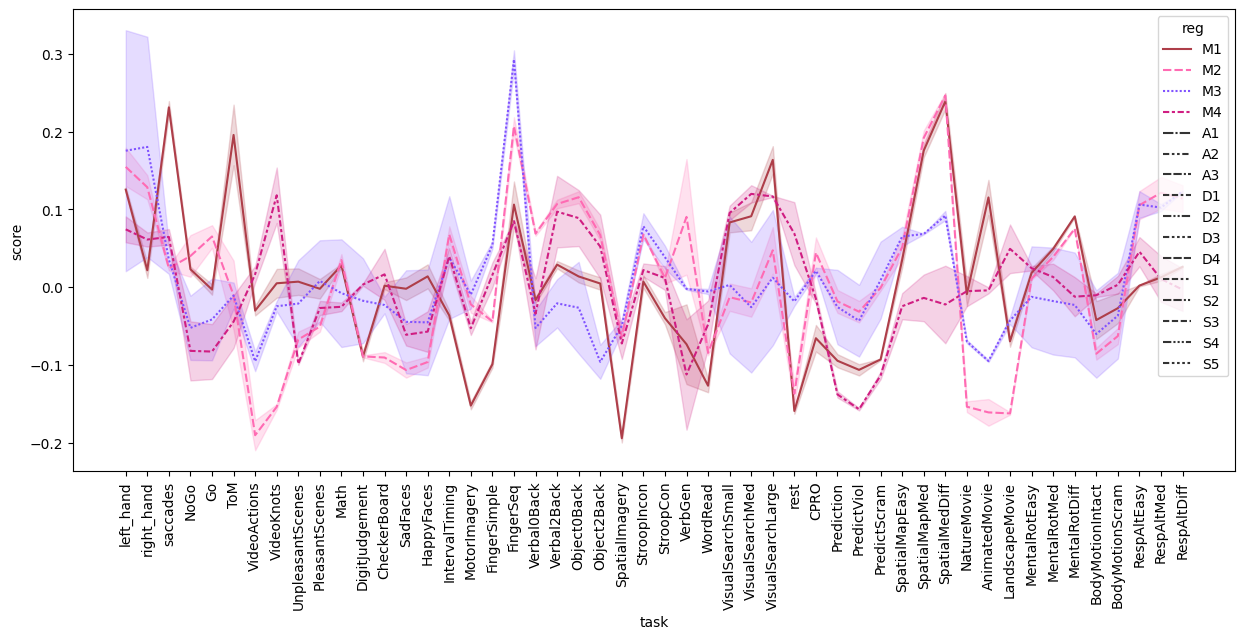

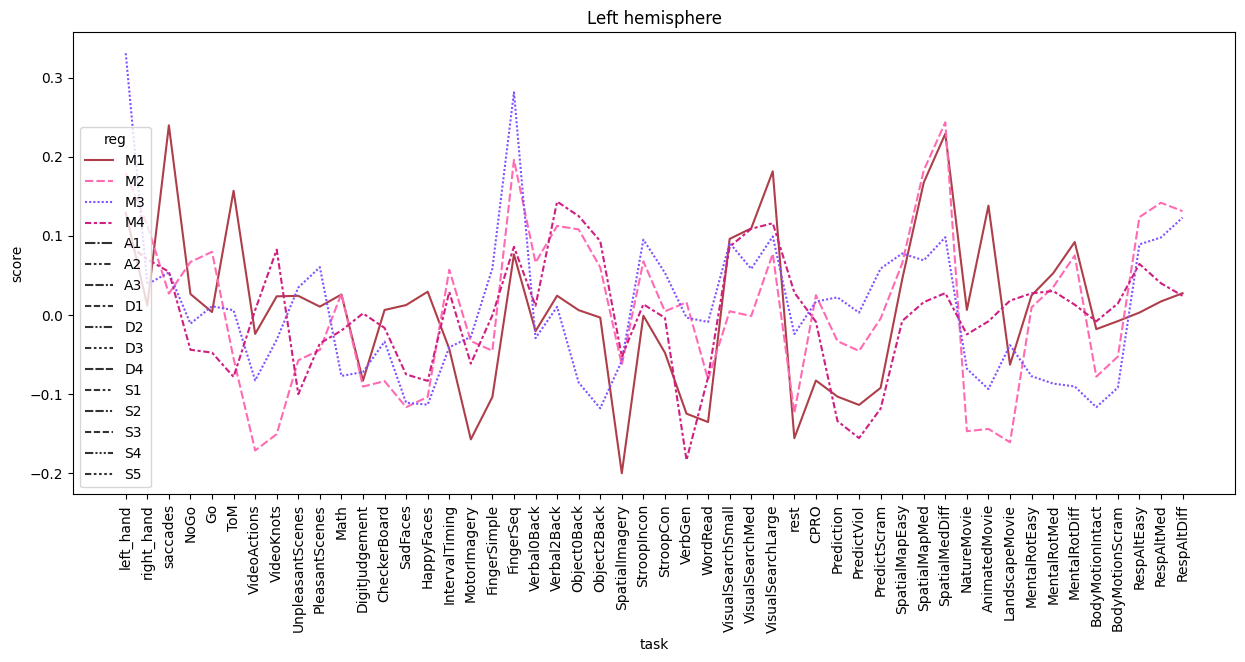

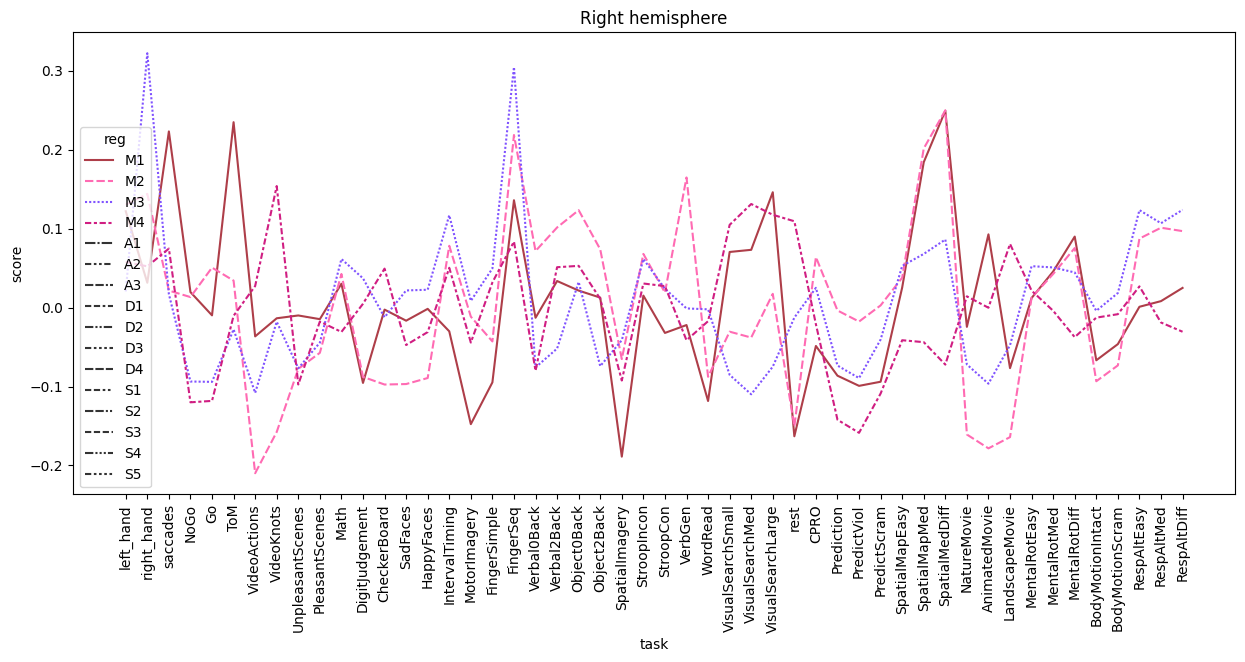

In [37]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


# Compare left and right hemisphere

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:143: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:143: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/

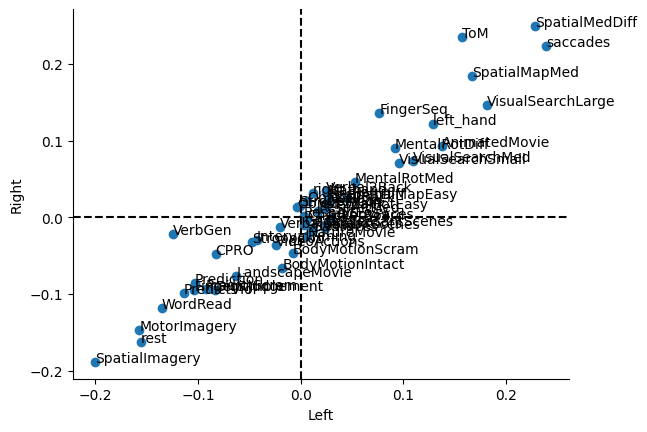

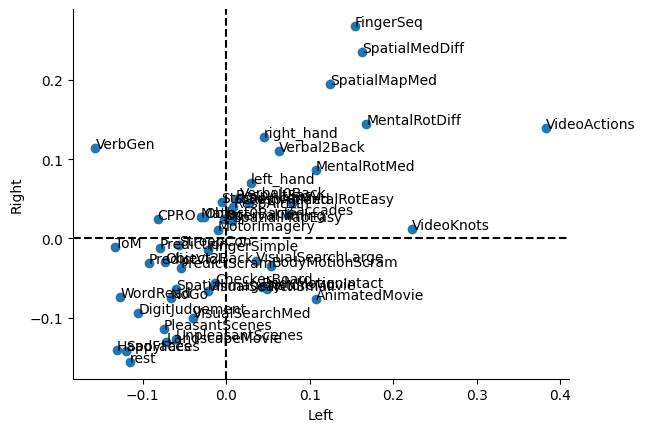

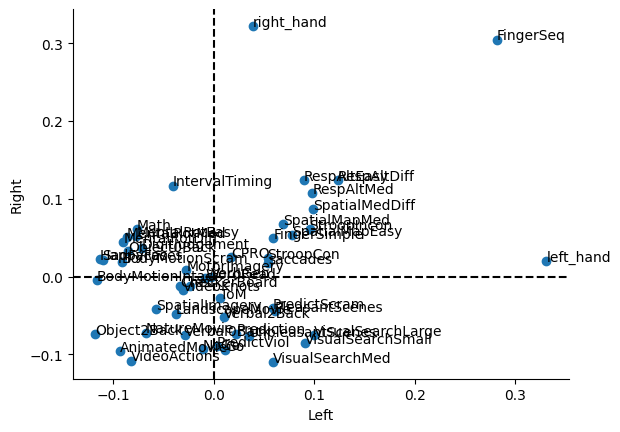

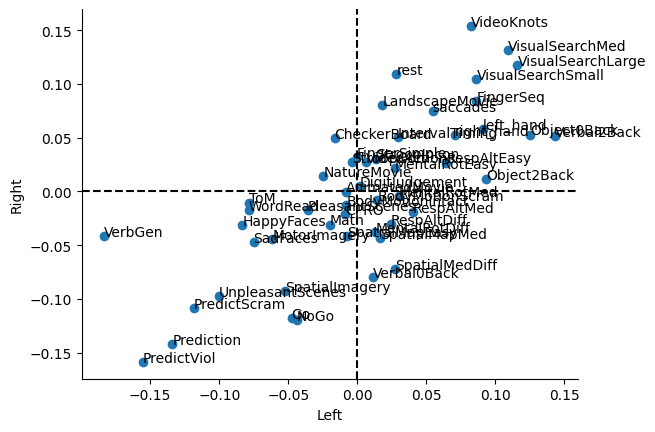

In [38]:
fm.scatter_plot_hemispheres('M1', T)
plt.figure()
fm.scatter_plot_hemispheres('A1', T)
plt.figure()
fm.scatter_plot_hemispheres('M3', T)
plt.figure()
fm.scatter_plot_hemispheres('M4', T)

# Plot differentiating tasks

([<matplotlib.axis.XTick at 0x1613d1a00>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoActions'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialImagery'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text(3

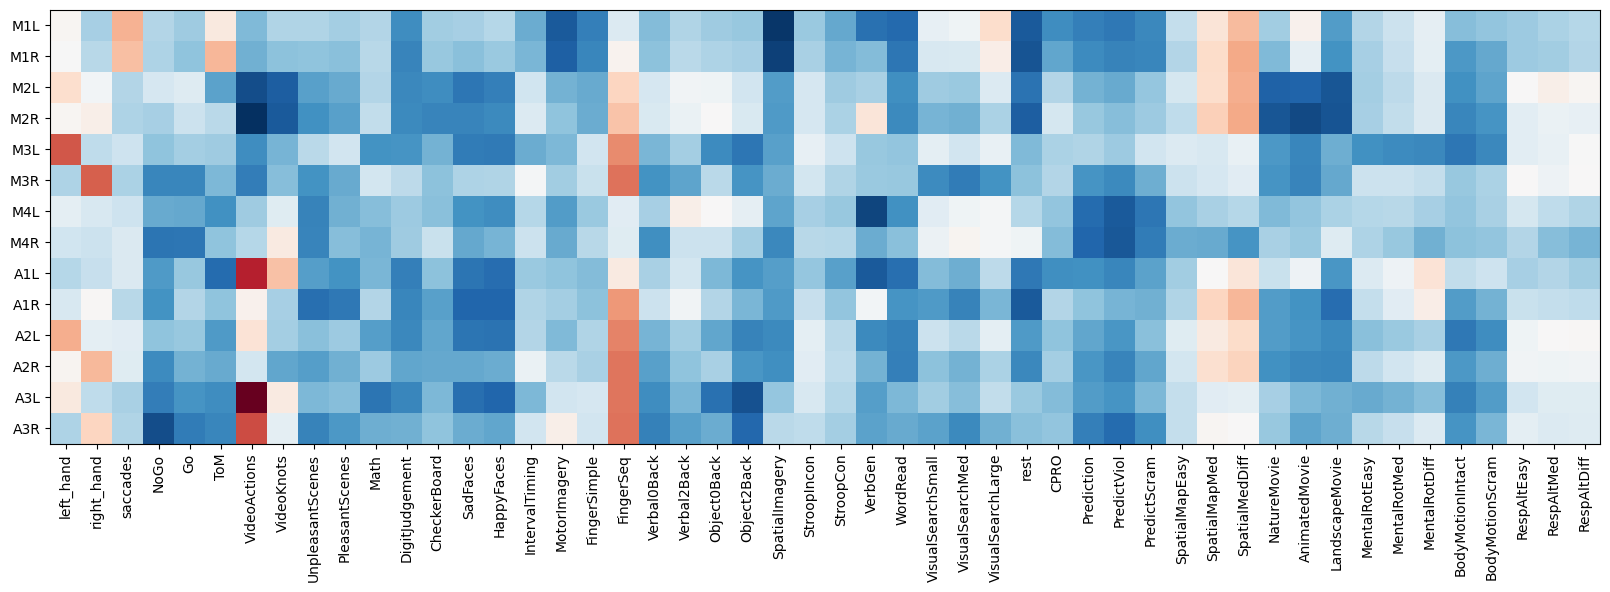

In [39]:
plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)


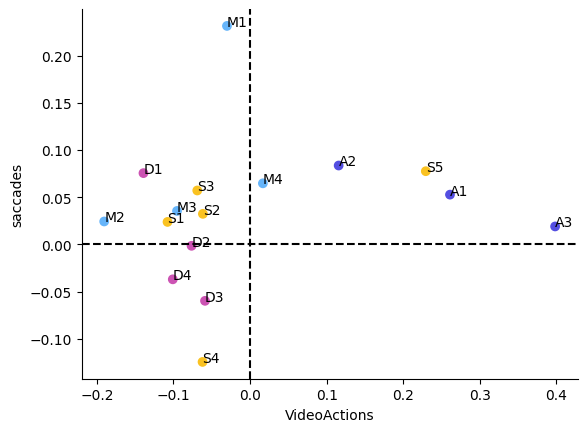

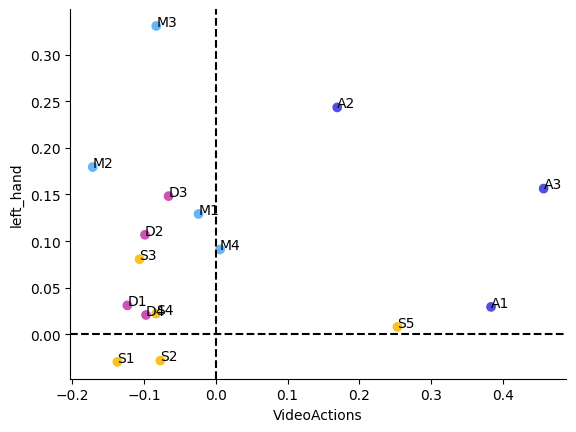

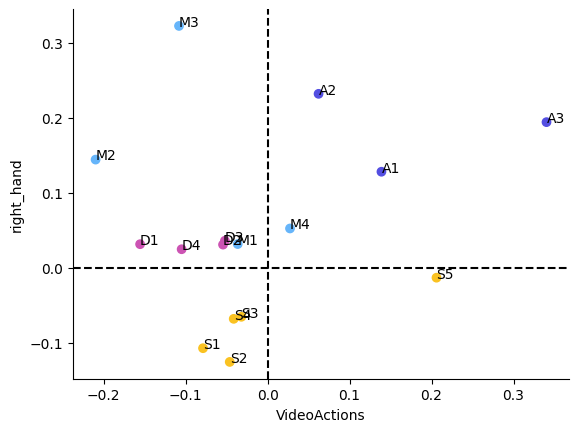

In [41]:
compare = ['VideoActions', 'saccades']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')
# Remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['VideoActions', 'left_hand']
fm.scatter_plot_tasks(compare, T[T.side=='L'], ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['VideoActions', 'right_hand']
fm.scatter_plot_tasks(compare, T[T.side == 'R'],
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


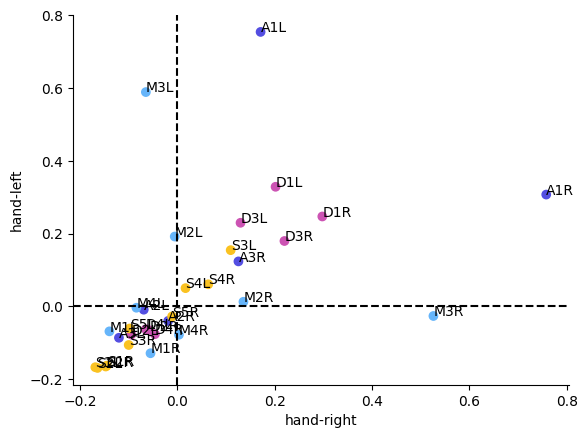

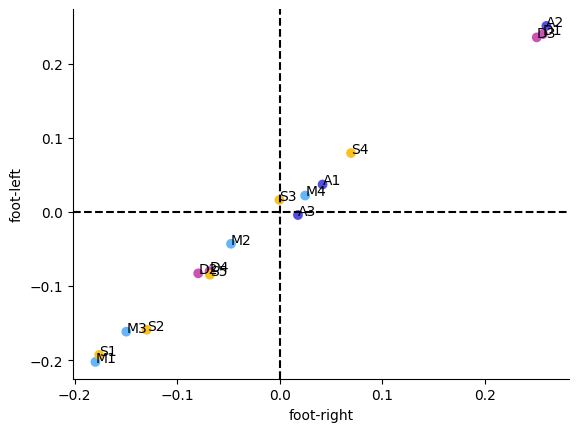

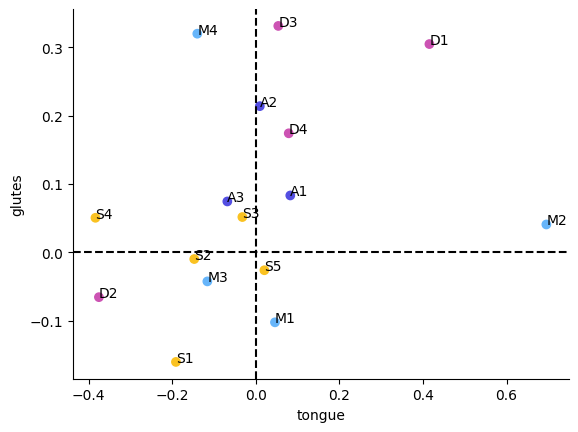

In [42]:
# Melt Somatotopic dataframe so that each row is a region task pair and the columns are index (region), task, score
# Make the index the region and the columns the condition
S = deepcopy(Somatotopic[regions + ['condition']])
S.index = S.condition
S.index.name = None
S = S.drop(columns='condition')
# Melt
S = S.reset_index().melt(id_vars='index', value_vars=S.columns.tolist(),
                                       var_name='region', value_name='score')

S['task'] = S['index']
S['index'] = S['region']
# # Split region into side and region
S['side'] = S.region.str[-1]
S['reg'] = S.region.str[0:2]
S['domains'] = S.region.str[0]

compare = ['hand-right', 'hand-left']
fm.scatter_plot_tasks(compare, S, ignore_side=False, color='domains')
# Remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['foot-right', 'foot-left']
fm.scatter_plot_tasks(compare, S,
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure()
compare = ['tongue', 'glutes']
fm.scatter_plot_tasks(compare, S,
                      ignore_side=True, color='domains')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


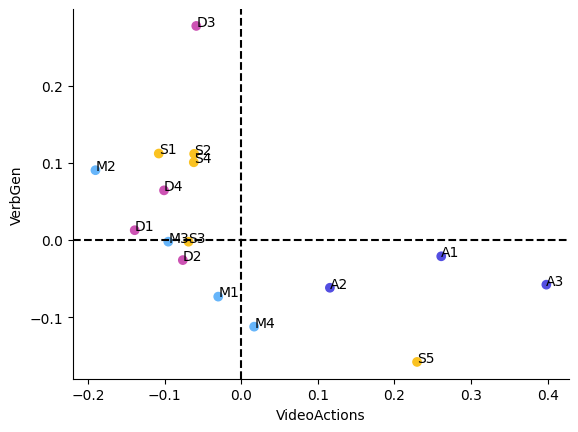

In [43]:
compare = ['VideoActions', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


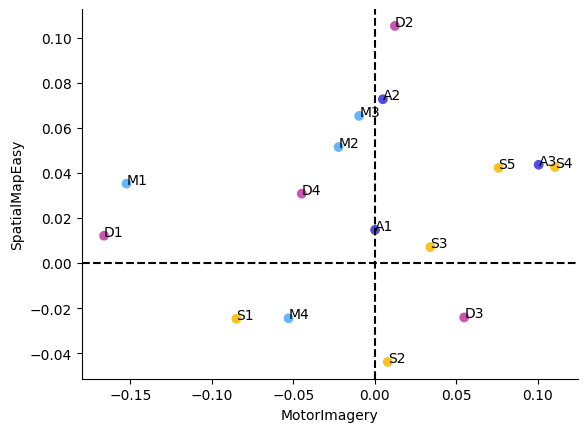

In [44]:
compare = ['MotorImagery', 'SpatialMapEasy']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


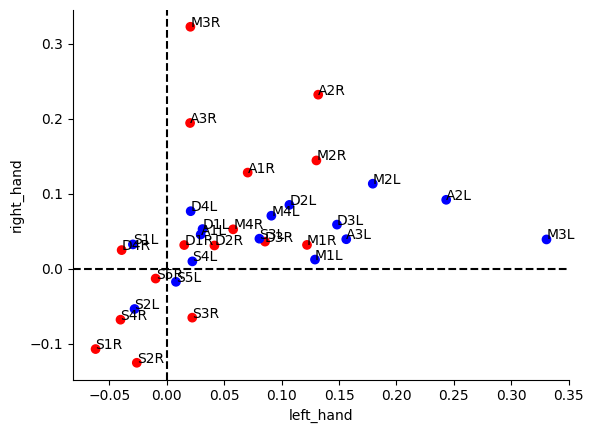

In [45]:
compare = ['left_hand', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
plt.savefig(
    ut.figure_dir + f'localizers_motor_{compare[0]}_{compare[1]}_left-right_hand.png', dpi=300)


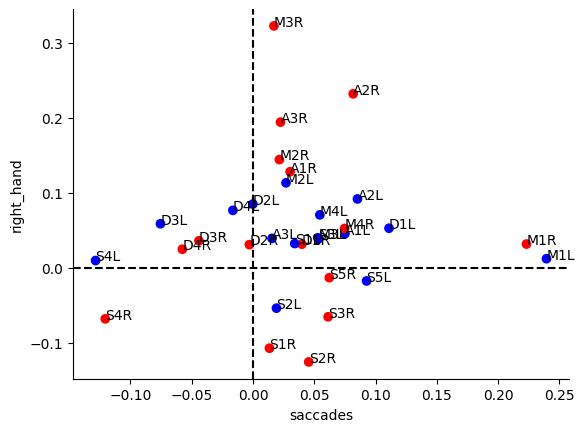

In [46]:
compare = ['saccades', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
